# PREDICT RESTAURANT RATINGS

### IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

### READING THE DATASET

In [2]:
df = pd.read_csv('Dataset.csv')

### EXPLORATORY DATA ANALYSIS 

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [7]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [8]:
df.shape

(9551, 21)

In [9]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [10]:
df.sample(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
1933,18291450,Choudhary Gohana Famous Jalebi,1,Gurgaon,"Shop 3, Near Vita Booth, Huda Market, Sector 4...",Sector 45,"Sector 45, Gurgaon",77.059978,28.434140,"Mithai, Street Food",...,Indian Rupees(Rs.),No,No,No,No,1,3.2,Orange,Average,10
4908,9829,Cafe Coffee Day,1,New Delhi,"A 47, Ground Floor, Gurunanak Road, Opposite V...",Laxmi Nagar,"Laxmi Nagar, New Delhi",77.286623,28.636622,Cafe,...,Indian Rupees(Rs.),No,No,No,No,1,2.8,Orange,Average,14
96,17284179,Longhorn Steakhouse,216,Albany,"2733 Dawson Rd, Albany, GA 31707",Albany,"Albany, Albany",-84.222900,31.618500,"American, Steak",...,Dollar($),No,No,No,No,2,3.5,Yellow,Good,58
6051,3118,U Like,1,New Delhi,"3083, Raj Guru Road, Chuna Mandi, Paharganj, N...",Paharganj,"Paharganj, New Delhi",77.211091,28.645258,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,3.0,Orange,Average,16
5455,18352186,Keventers,1,New Delhi,"14/16, Main Market, Model Town 2, New Delhi",Model Town 2,"Model Town 2, New Delhi",77.190347,28.706013,Beverages,...,Indian Rupees(Rs.),No,No,No,No,1,3.1,Orange,Average,17


#### HANDLING NULL VALUES

In [11]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [12]:
df.dropna(subset=['Cuisines'], inplace=True)
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

### DATA VISUALIZATION

#### PIECHART

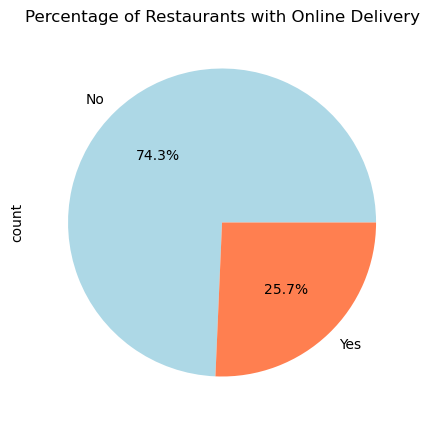

In [37]:
plt.figure(figsize=(5, 5))
df['Has Online delivery'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'coral'])
plt.title('Percentage of Restaurants with Online Delivery')
plt.show()

#### HISTOGRAM WITH DENSITY PLOT

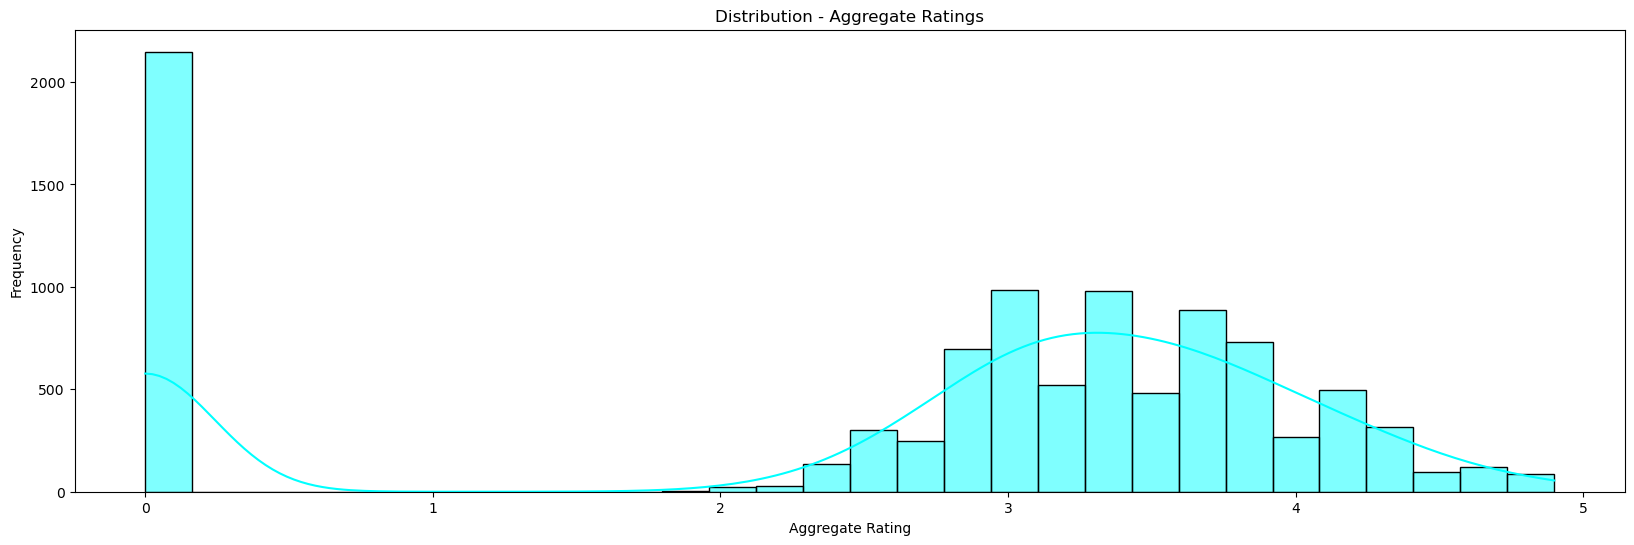

In [39]:
plt.figure(figsize=(20, 6))
sns.histplot(df['Aggregate rating'], bins=30, kde=True, color='cyan')
plt.title('Distribution - Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

#### SCATTERPLOT

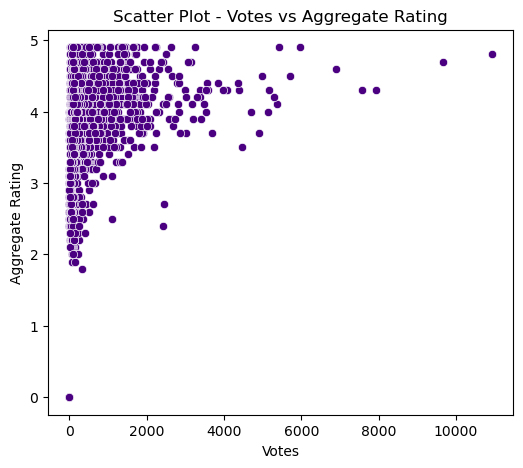

In [41]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df, color='indigo')
plt.title('Scatter Plot - Votes vs Aggregate Rating')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.show()

#### BOXPLOT

/home/u210390/tmp/ipykernel_2256154/1449494026.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price range', y='Aggregate rating', data=df, palette='pastel')


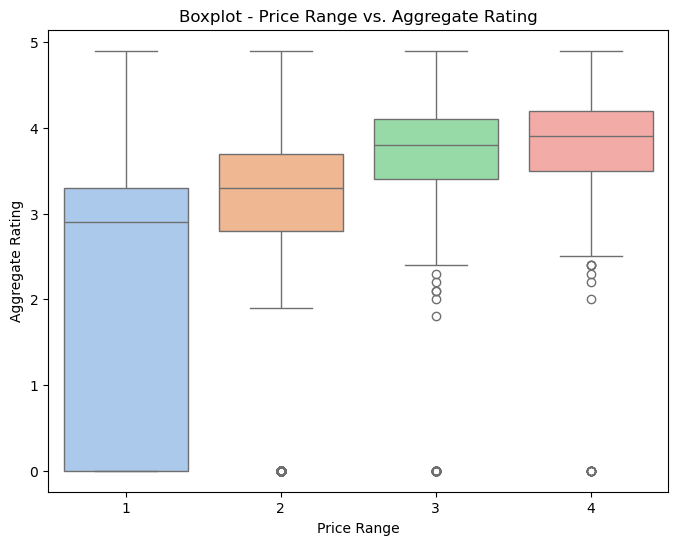

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Price range', y='Aggregate rating', data=df, palette='pastel')
plt.title('Boxplot - Price Range vs. Aggregate Rating')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()

#### VIOLIN PLOT

/home/u210390/tmp/ipykernel_2256154/3570023706.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Has Online delivery', y='Aggregate rating', data=df, palette='pastel')


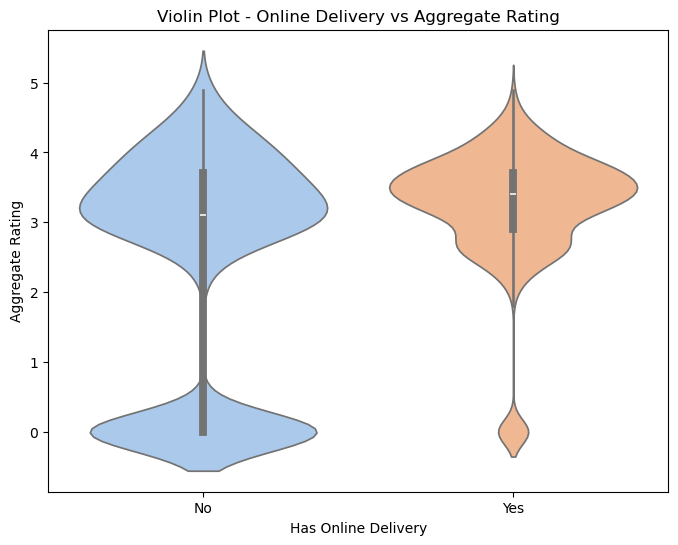

In [43]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Has Online delivery', y='Aggregate rating', data=df, palette='pastel')
plt.title('Violin Plot - Online Delivery vs Aggregate Rating')
plt.xlabel('Has Online Delivery')
plt.ylabel('Aggregate Rating')
plt.show()

#### HEATMAP

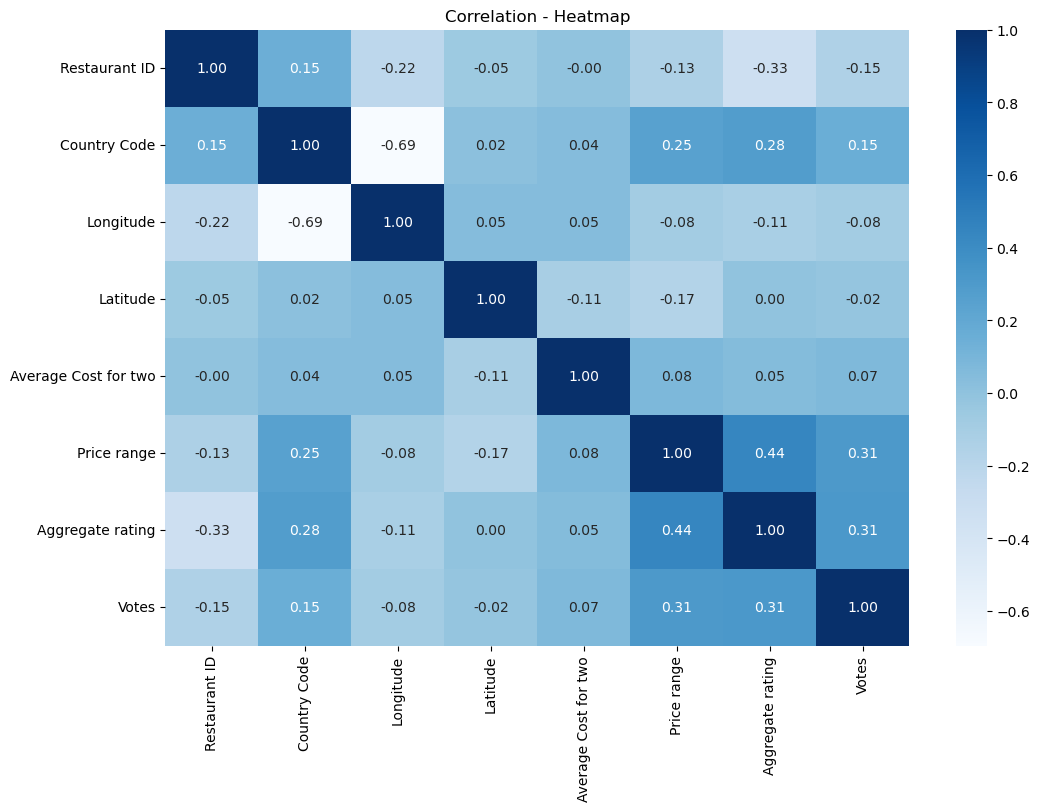

In [18]:
num_columns = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = num_columns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation - Heatmap')
plt.show()

### DATA PREPROCESSING

### TRANSFORMING DATA

In [19]:
X = df.drop(columns=['Aggregate rating', 'Restaurant ID', 'Restaurant Name', 'Rating color'])
y = df['Aggregate rating']

In [20]:
num_features = ['Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Votes']
cat_features = ['City', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 
                        'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating text']

In [21]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

In [22]:
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [23]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])

### TRAIN AND TEST SPLIT

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### MODEL DEPLOYMENT

#### LINEAR REGRESSION

In [25]:
model_linear_regression = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [26]:
model_linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Country Code', 'Longitude',
                                                   'Latitude',
                                                   'Average Cost for two',
                                                   'Price range', 'Votes']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['City', 'Locality',
                                                   'Locality Verbose',
                                                   'Cuisines', 'Currency',
                                                   'Has Table booking',
                                                   'Has Online delivery',
                                                   'Is delivering now',
                                                   'Switch to order menu',
                                                   'Rating text'])])),
                ('regressor', LinearRegression())])

In [27]:
y_pred_linear_regression = model_linear_regression.predict(X_test)

In [28]:
msqur_linear_regression = mean_squared_error(y_test, y_pred_linear_regression)
rsqur_linear_regression = r2_score(y_test, y_pred_linear_regression)

In [29]:
print("Linear Regression Model:")
print(f"Mean Squared Error: {msqur_linear_regression}")
print(f"R-squared: {rsqur_linear_regression}")

Linear Regression Model:
Mean Squared Error: 0.0336131893520818
R-squared: 0.9853219577718778


#### DECISION TREE REGRESSION

In [30]:
model_decision_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

In [31]:
model_decision_tree.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Country Code', 'Longitude',
                                                   'Latitude',
                                                   'Average Cost for two',
                                                   'Price range', 'Votes']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['City', 'Locality',
                                                   'Locality Verbose',
                                                   'Cuisines', 'Currency',
                                                   'Has Table booking',
                                                   'Has Online delivery',
                                                   'Is delivering now',
                                                   'Switch to order menu',
                                                   'Rating text'])])),
                ('regressor', DecisionTreeRegressor(random_state=42))])

In [32]:
y_pred_decision_tree = model_decision_tree.predict(X_test)

In [33]:
msqur_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
rsqur_decision_tree = r2_score(y_test, y_pred_decision_tree)

In [34]:
print("Decision Tree Regression Model:")
print(f"Mean Squared Error: {msqur_decision_tree}")
print(f"R-squared: {rsqur_decision_tree}")

Decision Tree Regression Model:
Mean Squared Error: 0.05935044525929805
R-squared: 0.9740831394293181


### COMPARISON OF ERRORS

/home/u210390/tmp/ipykernel_2256154/220111076.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=msqur_values, palette=colors_msqur, ax=axes[0])
/home/u210390/tmp/ipykernel_2256154/220111076.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=rsqur_values, palette=colors_rsqur, ax=axes[1])


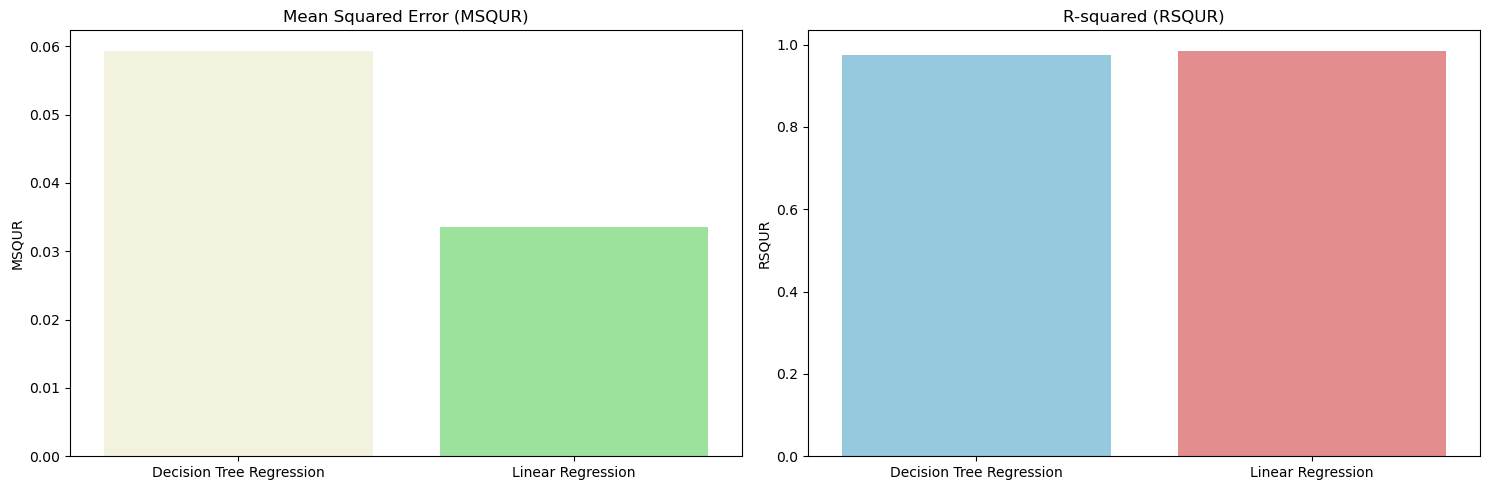

In [48]:
models = ['Decision Tree Regression', 'Linear Regression']
msqur_values = [msqur_decision_tree, msqur_linear_regression]
rsqur_values = [rsqur_decision_tree, rsqur_linear_regression]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

colors_msqur = ['beige', 'lightgreen']
sns.barplot(x=models, y=msqur_values, palette=colors_msqur, ax=axes[0])
axes[0].set_title('Mean Squared Error (MSQUR)')
axes[0].set_ylabel('MSQUR')

colors_rsqur = ['skyblue', 'lightcoral']
sns.barplot(x=models, y=rsqur_values, palette=colors_rsqur, ax=axes[1])
axes[1].set_title('R-squared (RSQUR)')
axes[1].set_ylabel('RSQUR')

plt.tight_layout()
plt.show()

### ACTUAL AND PREDICTED VISUALIZATION

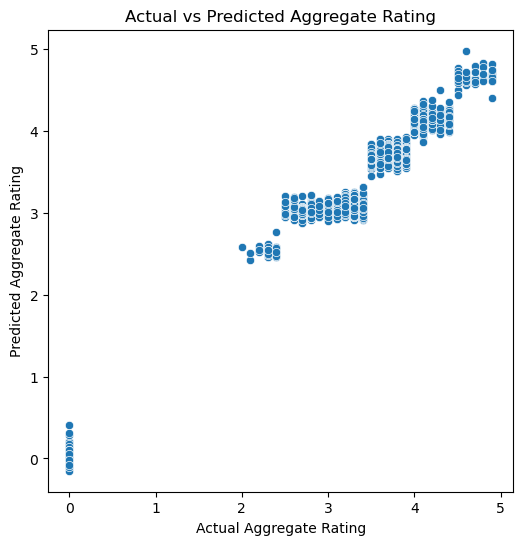

In [44]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_linear_regression)
plt.xlabel('Actual Aggregate Rating')
plt.ylabel('Predicted Aggregate Rating')
plt.title('Actual vs Predicted Aggregate Rating')
plt.show()